<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/EDA/scaler_transformer_normalizer/scaler_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.model_selection import train_test_split

In [2]:
N_SAMPLES = 1000
FONT_SIZE = 10
BINS = 30

In [3]:
rng = np.random.RandomState(304)
bc = PowerTransformer(method='box-cox')
yj = PowerTransformer(method='yeo-johnson')


qt = QuantileTransformer(
    n_quantiles=500, output_distribution="normal", random_state=rng
)

In [4]:
size = (N_SAMPLES, 1)

In [5]:
# lognormal distribution
X_lognormal = rng.lognormal(size=size)

# chi-squared distribution
df = 3
X_chisq = rng.chisquare(df=df, size=size)

# weibull distribution
a = 50
X_weibull = rng.weibull(a=a, size=size)


# gaussian distribution
loc = 100
X_gaussian = rng.normal(loc=loc, size=size)


# uniform distribution
X_uniform = rng.uniform(low=0, high=1, size=size)


# bimodal distribution
loc_a, loc_b = 100, 105
X_a, X_b = rng.normal(loc=loc_a, size=size), rng.normal(loc=loc_b, size=size)
X_bimodal = np.concatenate([X_a, X_b], axis=0)

In [6]:
distributions = [
    ('Lognormal', X_lognormal),
    ('Chi-squared', X_chisq),
    ('Weibull', X_weibull),
    ('Gaussian', X_gaussian),
    ('Uniform', X_uniform),
    ('Bimodal', X_bimodal),
]

In [7]:
colors = ["#D81B60", "#0188FF", "#FFC107", "#B7A2FF", "#000000", "#2EC5AC"]

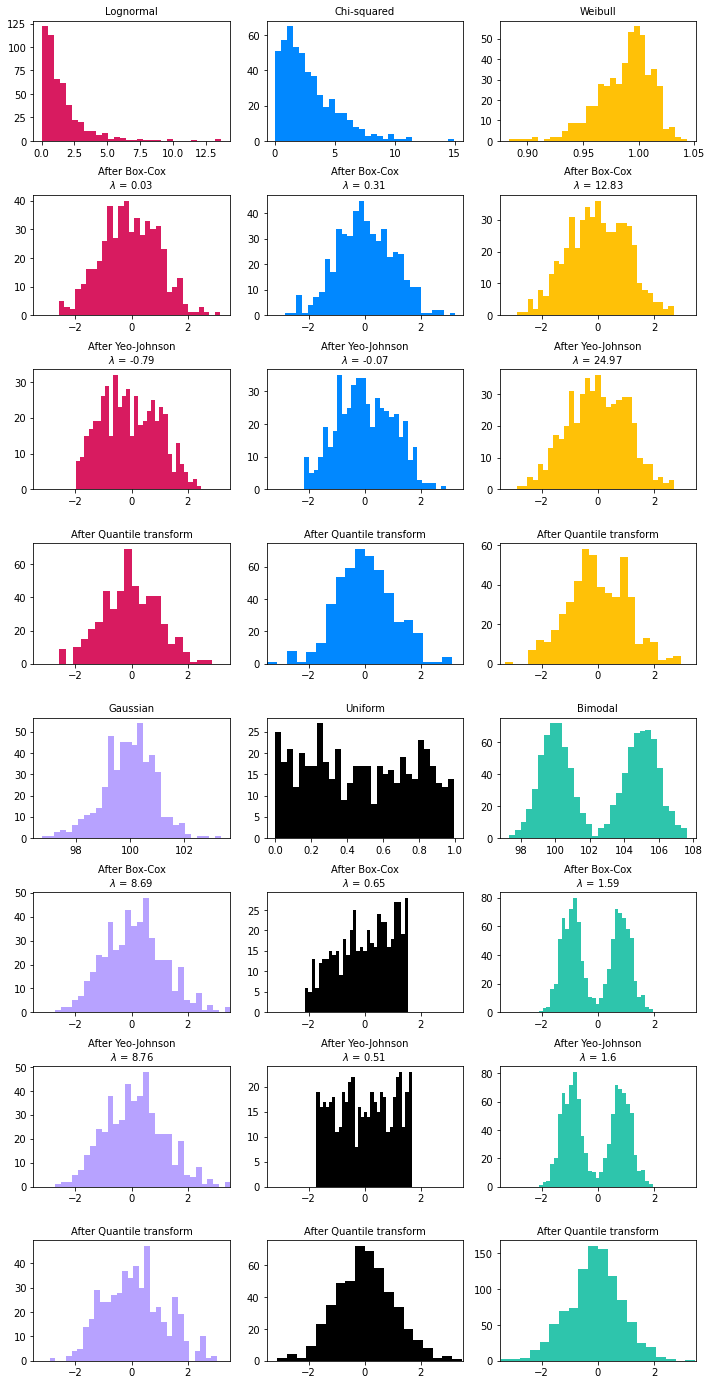

In [11]:
fig, axes = plt.subplots(nrows = 8, ncols = 3, figsize = (10, 20))
axes = axes.flatten()
axes_idxs = [
    (0, 3, 6, 9),
    (1, 4, 7, 10),
    (2, 5, 8, 11),
    (12, 15, 18, 21),
    (13, 16, 19, 22),
    (14, 17, 20, 23),
]

axes_list = [(axes[i], axes[j], axes[k], axes[l]) for (i, j, k, l) in axes_idxs]


for distribution, color, axes in zip(distributions, colors, axes_list):
  name, X = distribution
  X_train, X_test = train_test_split(X, test_size=0.5)

  # perform power transforms and quantile transform
  X_trans_bc = bc.fit(X_train).transform(X_test)
  lmbda_bc = round(bc.lambdas_[0], 2)
  X_trans_yj = yj.fit(X_train).transform(X_test)
  lmbda_yj = round(yj.lambdas_[0], 2)
  X_trans_qt = qt.fit(X_train).transform(X_test)

  ax_original, ax_bc, ax_yj, ax_qt = axes

  ax_original.hist(X_train, color=color, bins=BINS)
  ax_original.set_title(name, fontsize=FONT_SIZE)
  ax_original.tick_params(axis="both", which="major", labelsize=FONT_SIZE)

  for ax, X_trans, meth_name, lmbda in zip(
      (ax_bc, ax_yj, ax_qt),
      (X_trans_bc, X_trans_yj, X_trans_qt),
      ("Box-Cox", "Yeo-Johnson", "Quantile transform"),
      (lmbda_bc, lmbda_yj, None),
  ):
      ax.hist(X_trans, color=color, bins=BINS)
      title = "After {}".format(meth_name)
      if lmbda is not None:
          title += "\n$\\lambda$ = {}".format(lmbda)
      ax.set_title(title, fontsize=FONT_SIZE)
      ax.tick_params(axis="both", which="major", labelsize=FONT_SIZE)
      ax.set_xlim([-3.5, 3.5])
plt.tight_layout()
plt.subplots_adjust(top = 0.95)
plt.show()

# **Referencia**
---
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html#sphx-glr-auto-examples-preprocessing-plot-map-data-to-normal-py


- Author: Eric Chang <ericchang2017@u.northwestern.edu>
- Nicolas Hug <contact@nicolas-hug.com>
- License: BSD 3 clause